In [50]:
DATA_PATH = '../../data/Classification/processed/2_preprocessed_df.pkl'

Importation des libs

In [51]:
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import shutil
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

In [52]:
raw_df = pd.read_pickle(DATA_PATH)

MISSING VALUES

In [53]:
raw_df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
image           0
dtype: int64

On remarque la présence de 'unknown' dans notre dataset , on doit les remplacer en NaN afin d'obtenir tous les valeurs manquantes .

In [54]:
raw_df.replace(r'unknown',np.nan,inplace=True)

C:\Python39\lib\site-packages\pandas\core\missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


In [55]:
raw_df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age               0
sex              57
localization    234
path              0
image             0
dtype: int64

--> ENCODING

In [56]:
raw_df['localization']=raw_df['localization'].map({'back':0,'lower extremity':1,'trunk':2,'upper extremity':3,'abdomen':4,'face':5,'chest':6,'foot':7,'neck':8,'scalp':9,'hand':10,'ear':11,'genital':12,'acral':13})
raw_df['sex']=raw_df['sex'].map({'male':0,'female':1})

In [57]:
encoder= OrdinalEncoder()
raw_df[['dx','dx_type']]=encoder.fit_transform(raw_df[['dx','dx_type']].astype(str))

In [58]:
raw_df['sex'].value_counts()

0.0    5406
1.0    4552
Name: sex, dtype: int64

In [59]:
raw_df['dx'].value_counts()

5.0    6705
4.0    1113
2.0    1099
1.0     514
0.0     327
6.0     142
3.0     115
Name: dx, dtype: int64

In [60]:
raw_df['dx_type'].value_counts()

3.0    5340
2.0    3704
1.0     902
0.0      69
Name: dx_type, dtype: int64

In [61]:
raw_df['localization'].value_counts()

0.0     2192
1.0     2077
2.0     1404
3.0     1118
4.0     1022
5.0      745
6.0      407
7.0      319
8.0      168
9.0      128
10.0      90
11.0      56
12.0      48
13.0       7
Name: localization, dtype: int64

Handling Missing Values

In [62]:
raw_df.isna().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age               0
sex              57
localization    234
path              0
image             0
dtype: int64

In [63]:
raw_df['localization'].fillna(raw_df['localization'].mode()[0],inplace=True)
imputer2=KNNImputer(n_neighbors=1)
raw_df['sex']=imputer2.fit_transform(raw_df['sex'].values.reshape(-1,1))

In [64]:
raw_df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
image           0
dtype: int64

<AxesSubplot:>

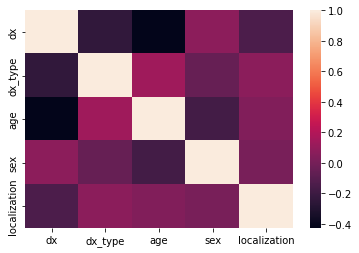

In [65]:
sns.heatmap(raw_df.corr())

Export Data

In [66]:
raw_df.to_pickle(DATA_PATH)